In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
from pylamp.neural.sequential import Sequential
from pylamp.neural.layers import Linear
from pylamp.loss.losses import CrossEntropyLoss
from pylamp.optim.optimizer import Optim
from pylamp.optim.optimizer import SGD
from pylamp.utils.usps import load_usps, show_usps
from pylamp.utils.plotter import Display
import pylamp.utils.functions as fn

## Loading Data

In [39]:
uspsdatatrain = "./data/USPS/USPS_train.txt"
uspsdatatest = "./data/USPS/USPS_test.txt"
X_train, y_train = load_usps(uspsdatatrain)
X_test, y_test = load_usps(uspsdatatest)

In [40]:
X_train, X_test = fn.normalize_data(X_train, X_test)
y_train_one_hot = fn.to_one_hot(y_train, 10)

Label:  6
x size:  256


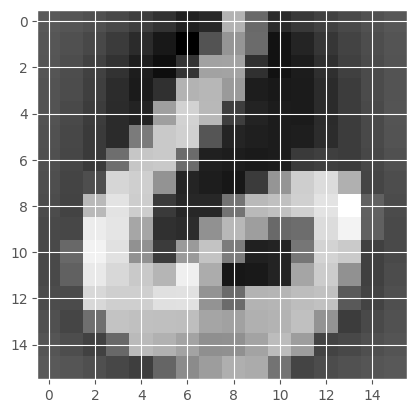

In [41]:
print('Label: ',y_train[0])
print("x size: ",len(X_train[0]))
show_usps(X_train[0])

## Sequential with a single linear layer

In [42]:
sequential_model = Sequential()

# no need for softmax activation because it is included in the loss function
sequential_model.add_module(Linear(input_size=256, output_size=10))

loss_func = CrossEntropyLoss()
optimizer = Optim(sequential_model,loss_func,1e-5)
batch_size = 256
epochs = 500

sequential_model_losses = SGD(optimizer,X_train, y_train_one_hot, batch_size,epochs,verbose=True)

Epoch 1/500, Average Loss: 2.9913613466957436
Epoch 51/500, Average Loss: 0.40043292731982427
Epoch 101/500, Average Loss: 0.2940268307599734
Epoch 151/500, Average Loss: 0.25372479943091975
Epoch 201/500, Average Loss: 0.2276568534656238
Epoch 251/500, Average Loss: 0.21140464184282043
Epoch 301/500, Average Loss: 0.1993198215874669
Epoch 351/500, Average Loss: 0.1897037276879717
Epoch 401/500, Average Loss: 0.18244243891525008
Epoch 451/500, Average Loss: 0.1747410662072618
Training finished.


Accuracy = 0.9018435475834579


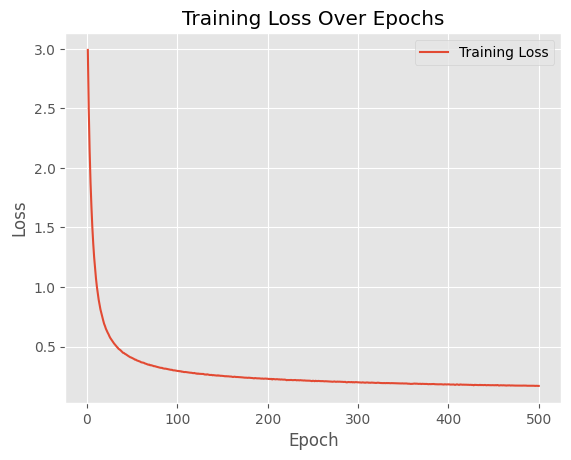

In [43]:
fn.print_accuracy(sequential_model,X_test,y_test)
Display.plot_loss(sequential_model_losses)

## Linear Module

In [44]:
model_linear = Linear(input_size=256, output_size=10)
loss_func = CrossEntropyLoss()

optimizer_linear = Optim(model_linear,loss_func,1e-5)

batch_size = 256
epochs = 500

model_linear_losses = SGD(optimizer_linear,X_train, y_train_one_hot, batch_size,epochs,verbose=True)

Epoch 1/500, Average Loss: 2.8196137119541462
Epoch 51/500, Average Loss: 0.39054879106215346
Epoch 101/500, Average Loss: 0.286495588419342
Epoch 151/500, Average Loss: 0.24734236087475453
Epoch 201/500, Average Loss: 0.2224456879903653
Epoch 251/500, Average Loss: 0.20546357039271346
Epoch 301/500, Average Loss: 0.19370116433854445
Epoch 351/500, Average Loss: 0.18285320411343536
Epoch 401/500, Average Loss: 0.17708160854065041
Epoch 451/500, Average Loss: 0.17013359534639752
Training finished.


Accuracy = 0.905829596412556


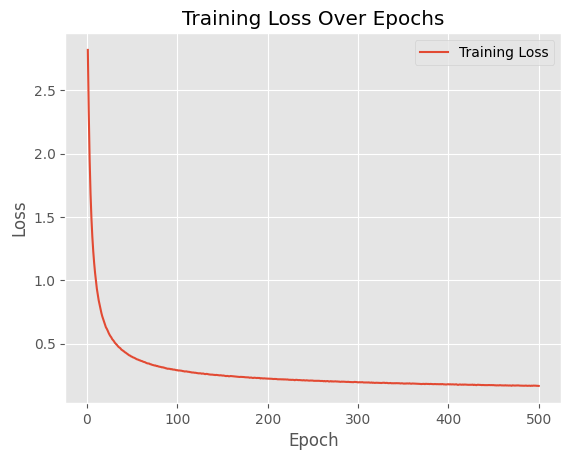

In [45]:
fn.print_accuracy(model_linear,X_test,y_test)
Display.plot_loss(model_linear_losses)